<a href="https://colab.research.google.com/github/Haseebiii/Face-Recognition/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import os
import pickle
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

headshots_folder_name = '/content/Headsets'

# dimension of images
image_width = 224
image_height = 224

# for detecting faces
facecascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

# set the directory containing the images
images_dir = os.path.join(".", headshots_folder_name)

current_id = 0
label_ids = {}

# iterates through all the files in each subdirectories
for root, _, files in os.walk(images_dir):
    for file in files:
        if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg"):
        # path of the image
          path = os.path.join(root, file)

        # get the label name (name of the person)
          label = os.path.basename(root).replace(" ", ".").lower()

        # add the label (key) and its number (value)
          if not label in label_ids:
              label_ids[label] = current_id
              current_id += 1

        # load the image
        imgtest = cv2.imread(path, cv2.IMREAD_COLOR)
        image_array = np.array(imgtest, "uint8")

        # get the faces detected in the image
        faces = facecascade.detectMultiScale(imgtest, scaleFactor=1.1, minNeighbors=5)

        # if not exactly 1 face is detected, skip this photo
        if len(faces) != 1:
            print(f'---Photo skipped---\n')
        # remove the original image
        os.remove(path)
        continue

        # save the detected face(s) and associate
        # them with the label
        for (x_, y_, w, h) in faces:

            # draw the face detected
            face_detect = cv2.rectangle(imgtest,
                    (x_, y_),
                    (x_+w, y_+h),
                    (255, 0, 255), 2)
            plt.imshow(face_detect)
            plt.show()

            # resize the detected face to 224x224
            size = (image_width, image_height)

            # detected face region
            roi = image_array[y_: y_ + h, x_: x_ + w]

            # resize the detected head to target size
            resized_image = cv2.resize(roi, size)
            image_array = np.array(resized_image, "uint8")

            # remove the original image
            os.remove(path)

            # replace the image with only the face
            im = Image.fromarray(image_array)
            im.save(path)


---Photo skipped---

---Photo skipped---

---Photo skipped---



In [1]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2023-05-11 18:30:21--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.07s   

2023-05-11 18:30:21 (12.4 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



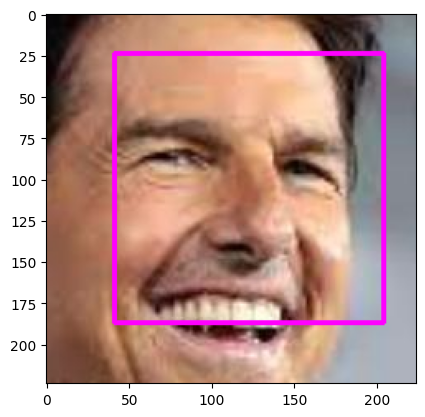

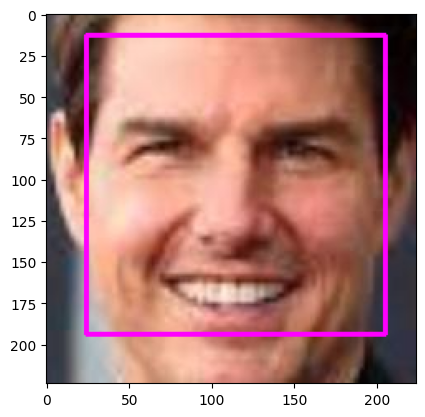

---Photo skipped---



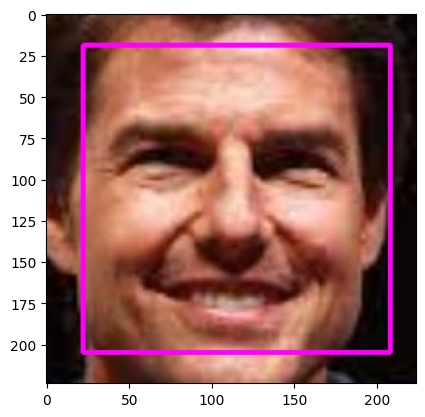

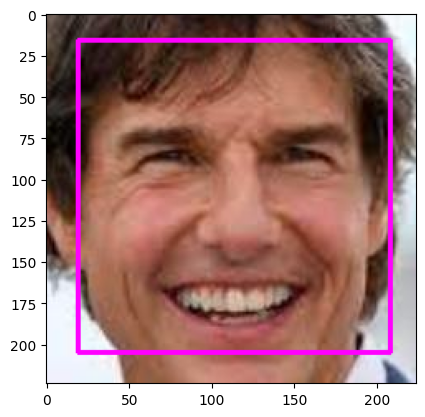

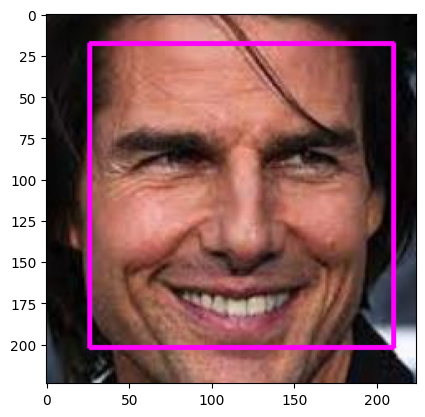

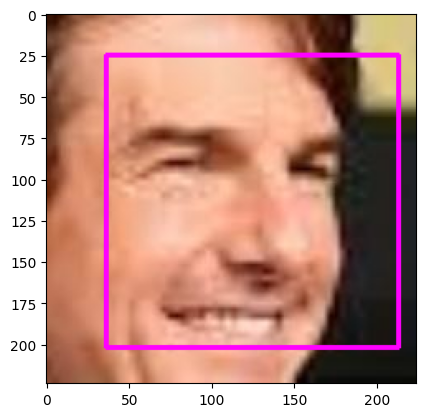

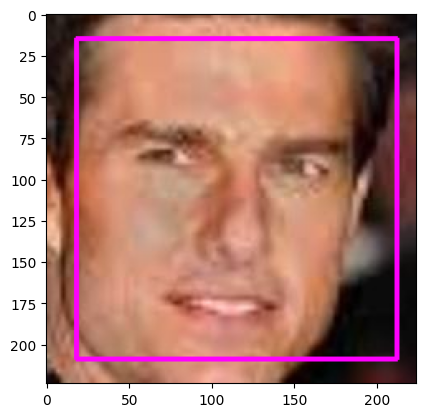

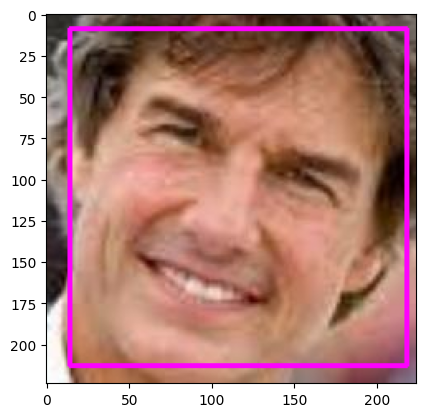

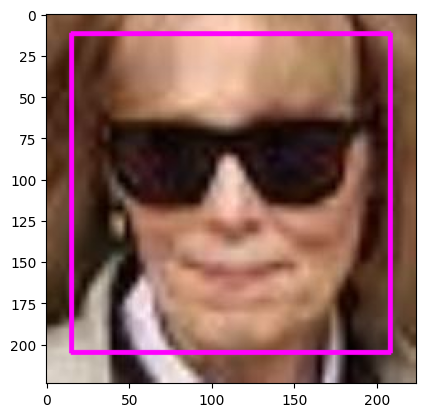

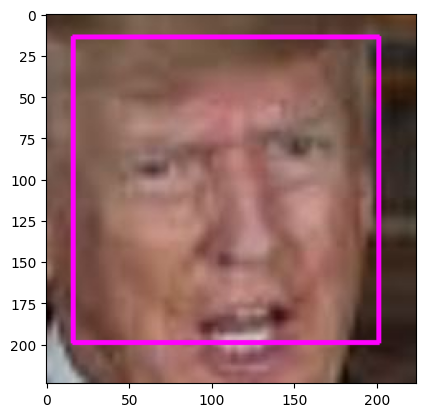

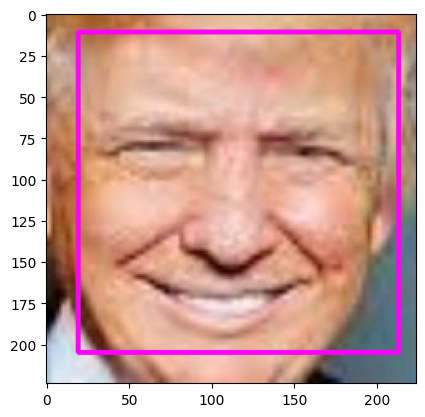

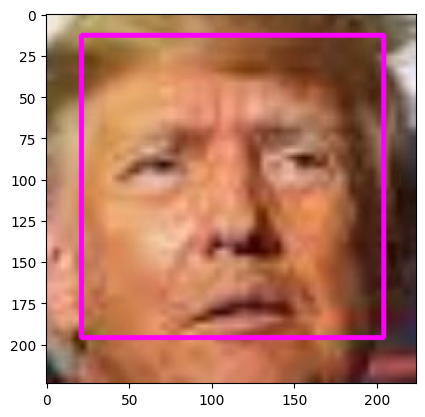

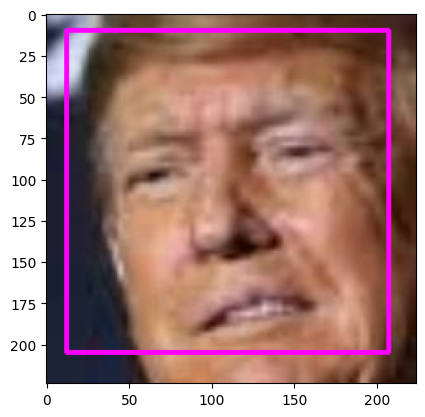

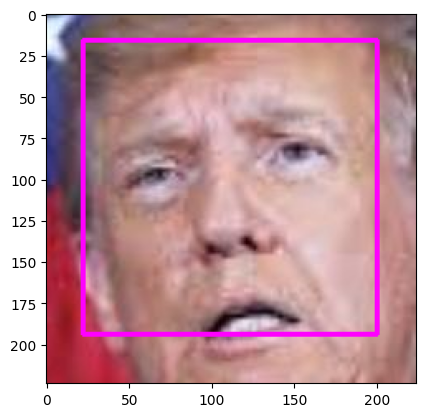

---Photo skipped---



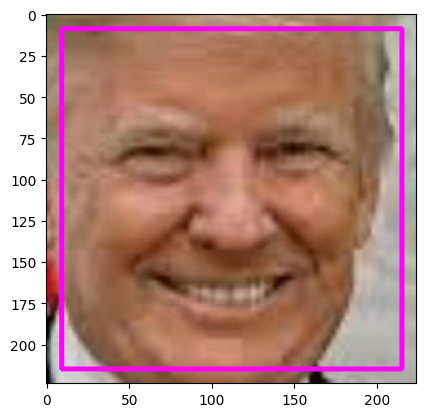

---Photo skipped---



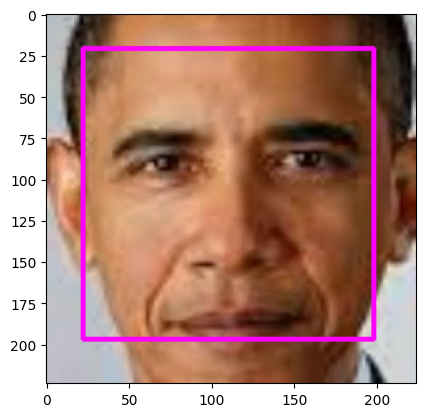

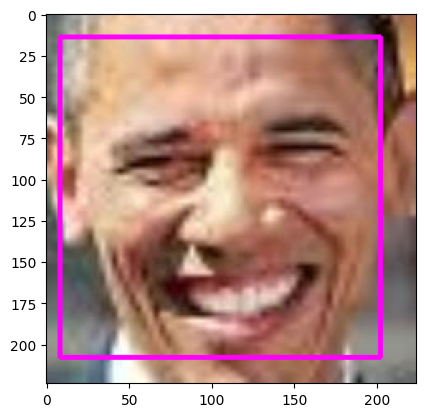

---Photo skipped---



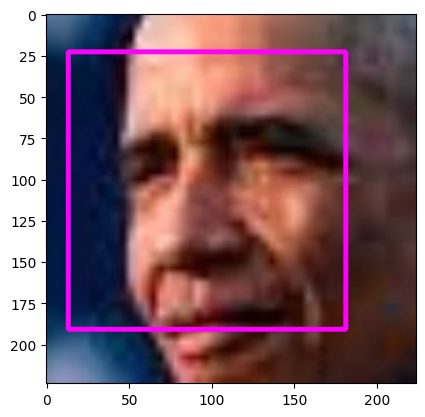

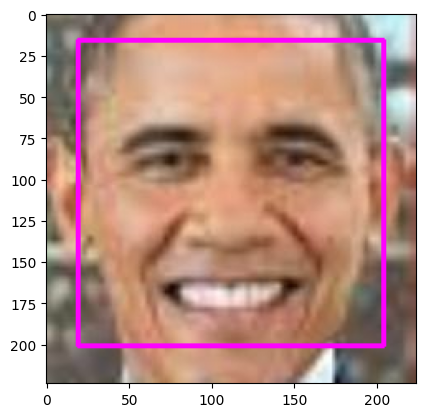

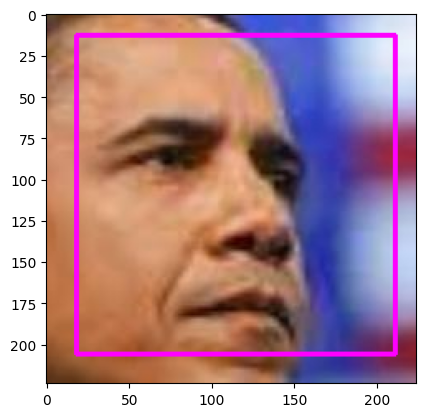

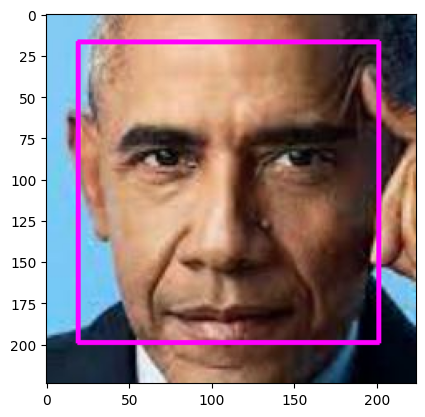

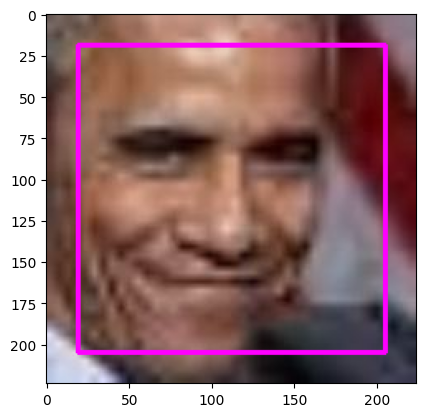

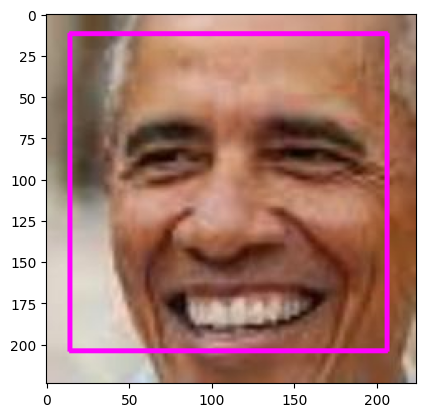

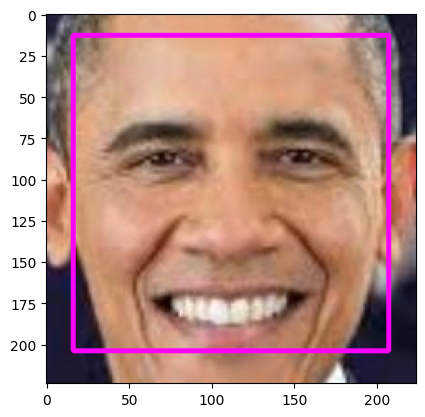

In [7]:
import cv2
import os
import pickle
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

headshots_folder_name = '/content/drive/MyDrive/APractice/Headsets'

# dimension of images
image_width = 224
image_height = 224

# for detecting faces
facecascade = cv2.CascadeClassifier('/content/drive/MyDrive/APractice/haarcascade_frontalface_default.xml')

# set the directory containing the images
images_dir = os.path.join(".", headshots_folder_name)

current_id = 0
label_ids = {}

# iterates through all the files in each subdirectories
for root, _, files in os.walk(images_dir):
    for file in files:
        if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg"):
            # path of the image
            path = os.path.join(root, file)

            # get the label name (name of the person)
            label = os.path.basename(root).replace(" ", ".").lower()

            # add the label (key) and its number (value)
            if not label in label_ids:
                label_ids[label] = current_id
                current_id += 1

            # load the image
            imgtest = cv2.imread(path, cv2.IMREAD_COLOR)
            image_array = np.array(imgtest, "uint8")

            # get the faces detected in the image
            faces = facecascade.detectMultiScale(imgtest, scaleFactor=1.1, minNeighbors=5)

            # if not exactly 1 face is detected, skip this photo
            if len(faces) != 1:
                print(f'---Photo skipped---\n')
                # remove the original image
                # os.remove(path)
                continue

            # save the detected face(s) and associate
            # them with the label
            for (x_, y_, w, h) in faces:

                # draw the face detected
                face_detect = cv2.rectangle(imgtest,
                        (x_, y_),
                        (x_+w, y_+h),
                        (255, 0, 255), 2)
                plt.imshow(face_detect)
                plt.show()

                # resize the detected face to 224x224
                size = (image_width, image_height)

                # detected face region
                roi = image_array[y_: y_ + h, x_: x_ + w]

                # resize the detected head to target size
                resized_image = cv2.resize(roi, size)
                image_array = np.array(resized_image, "uint8")

                # remove the original image
                os.remove(path)

                # replace the image with only the face
                im = Image.fromarray(image_array)
                im.save(path)


In [28]:
!cp -r /content/keras-vggface /content/drive/MyDrive/APractice

In [11]:
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam


In [12]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/APractice/Headsets', target_size=(224,224), color_mode='rgb', batch_size=32, class_mode='categorical', shuffle=True)


Found 28 images belonging to 4 classes.


In [13]:
train_generator.class_indices.values()
# dict_values([0, 1, 2])
NO_CLASSES = len(train_generator.class_indices.values())


In [14]:
!pip install keras_vggface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from keras_vggface.vggface import VGGFace


ModuleNotFoundError: ignored

In [16]:
!pip install keras_applications


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.6 MB/s eta 0:00:00


In [22]:
!pip uninstall keras_vggface -y
!pip install tensorflow.keras_vggface


Found existing installation: keras-vggface 0.6
Uninstalling keras-vggface-0.6:
  Successfully uninstalled keras-vggface-0.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow.keras_vggface (from versions: none)
ERROR: No matching distribution found for tensorflow.keras_vggface


In [19]:
!pip install tensorflow==2.3.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0)
ERROR: No matching distribution found for tensorflow==2.3.0


In [21]:
from tensorflow.keras_vggface.vggface import VGGFace


ModuleNotFoundError: ignored

In [25]:
!git clone https://github.com/rcmalli/keras-vggface.git

Cloning into 'keras-vggface'...
remote: Enumerating objects: 286, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 286 (delta 0), reused 1 (delta 0), pack-reused 284
Receiving objects: 100% (286/286), 6.03 MiB | 20.38 MiB/s, done.
Resolving deltas: 100% (137/137), done.


In [29]:
%cd /content/drive/MyDrive/APractice/keras-vggface

/content/drive/MyDrive/APractice/keras-vggface


In [30]:
from keras_vggface.vggface import VGGFace

base_model = VGGFace(include_top=True,
    model='vgg16',
    input_shape=(224, 224, 3))
base_model.summary()

print(len(base_model.layers))
# 26 layers in the original VGG-Face


580070376/580070376 [==============================] - 8s 0us/step
Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                    

In [31]:
base_model = VGGFace(include_top=False, model='vgg16',
input_shape=(224, 224, 3))
base_model.summary()
print(len(base_model.layers))
# 19 layers after excluding the last few layers


58909280/58909280 [==============================] - 0s 0us/step
Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                      

In [33]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

# final layer with softmax activation
preds = Dense(NO_CLASSES, activation='softmax')(x)


In [34]:
# create a new model with the base model's original input and the 
# new model's output
model = Model(inputs = base_model.input, outputs = preds)
model.summary()

# don't train the first 19 layers - 0..18
for layer in model.layers[:19]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model.layers[19:]:
    layer.trainable = True


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

In [35]:
model.compile(optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [36]:
model.fit(train_generator,
  batch_size = 1,
  verbose = 1,
  epochs = 20)


Epoch 1/20
1/1 [==============================] - 21s 21s/step - loss: 1.3841 - accuracy: 0.2500
Epoch 2/20
1/1 [==============================] - 17s 17s/step - loss: 1.2483 - accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 18s 18s/step - loss: 1.0875 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 19s 19s/step - loss: 0.8940 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 18s 18s/step - loss: 0.6822 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 17s 17s/step - loss: 0.4668 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 17s 17s/step - loss: 0.2758 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 19s 19s/step - loss: 0.1403 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 18s 18s/step - loss: 0.0652 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 17s 17s/step - loss: 0.0299 - accuracy: 1.0000
Epoch 11/20
1/1 [============

In [38]:
# creates a HDF5 file
model.save('/content/drive/MyDrive/APractice/face_cnn_model.h5')


In [40]:
import pickle

class_dictionary = train_generator.class_indices
class_dictionary = {
    value:key for key, value in class_dictionary.items()
}
print(class_dictionary)


{0: '.ipynb_checkpoints', 1: 'Burak Obama', 2: 'Donald Trump', 3: 'Tom Cruise'}


In [41]:
# save the class dictionary to pickle
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, 'wb') as f: pickle.dump(class_dictionary, f)